## Neural Network Implementation
In this notebook we will implement the neural network. In this notebook we will first read our dataset and then we will initialize the Neural Network and then we will first train it and then test it on testing dataset.

### Libraries to be used
In this notebook we will use following libraries:

- **Numpy**
- **Keras** (For Neural Network)
- **Matplotlib**
- **Pickle**

In [3]:
import numpy as np
import pickle
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, Dropout, Flatten, Dense, MaxPooling2D
from keras.regularizers import l2
import matplotlib.pyplot as plt

### Reading Training Dataset

In [7]:
with open('Data/X_train.pickle', 'rb') as f:
    X_train = pickle.load(f)
    
with open('Data/X_valid.pickle', 'rb') as f:
    X_valid = pickle.load(f)
    
with open('Data/X_test.pickle', 'rb') as f:
    X_test = pickle.load(f)

In [11]:
with open('Data/y_train.pickle', 'rb') as f:
    y_train = pickle.load(f)
    
with open('Data/y_valid.pickle', 'rb') as f:
    y_valid = pickle.load(f)
    
with open('Data/y_test.pickle', 'rb') as f:
    y_test = pickle.load(f)

In [20]:
print("Number of Images in Training set are: ", X_train.shape[0])
print("Number of Images in Validation set are: ", X_valid.shape[0])
print("Number of Images in Testing set are: ", X_test.shape[0])

Number of Images in Training set are:  945
Number of Images in Validation set are:  105
Number of Images in Testing set are:  50


## Data Augumentation
Data Augumentation is a technique by which we can flip and shit the image so then the model can learn in a better way and it also helps to prevent overfitting. By the help of data augumentation technique our model will be much more generic as compared to the model without data augumentation.

In [12]:
# data augumentation
datagen = ImageDataGenerator(
                width_shift_range = 0.1,
                height_shift_range=0.1,
                horizontal_flip=True
)

datagen.fit(X_train)

## One Hot Encoding the labels

In [13]:
#one hot encoding the classes (labels)
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[:10]

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

## Initializing the model
Now in this section below we will initialize the model. In this model we will be using following layers:

- 2 Conv2D Layers (Convolutional Layers)
- 3 Dropout Layers.
- 1 Max Pooling layer.
- 1 Flatten Layer.
- 1 Dense Layer.
- Output Layer with 5 nodes.

In this model we will also use **L1 Regularization**, this will penalize the weights of the model in case of overfitting. This will help the model to learn in a better way. 

In [60]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=16, kernel_size=4, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation="relu", input_shape=(IMG_SIZE, IMG_SIZE, 1)))
# Dropout Layer
cnn_model.add(Dropout(0.4))
#  Pooling layer
cnn_model.add(MaxPooling2D(pool_size=2))

# Conv Layer
cnn_model.add(Conv2D(filters=32, kernel_size=4, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation="relu"))
# Dropout Layer
cnn_model.add(Dropout(0.4))

# Now adding a Flatten layer to flatten the matrix into a vector so then we can classify the data
cnn_model.add(Flatten())

# Now same as MLP we will add Dense layer
cnn_model.add(Dense(128, activation="sigmoid"))
# Dropout Layer
cnn_model.add(Dropout(0.4))

# Output Layer
cnn_model.add(Dense(5, activation="softmax"))

cnn_model.summary()
cnn_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_53 (Conv2D)           (None, 122, 122, 16)      272       
_________________________________________________________________
dropout_66 (Dropout)         (None, 122, 122, 16)      0         
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 61, 61, 16)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 58, 58, 32)        8224      
_________________________________________________________________
dropout_67 (Dropout)         (None, 58, 58, 32)        0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 107648)            0         
_________________________________________________________________
dense_36 (Dense)             (None, 128)             

## Model Training
We will train the model with Checkpoints, this will save the best weights of the model.

In [61]:
# evaluating the model with validations
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='cnn.weights.best.hdf5', verbose=1, save_best_only=True)

batch_size = 20
epochs = 50

hist = cnn_model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                               steps_per_epoch=X_train.shape[0]//batch_size,
                               epochs=epochs,
                               validation_data=(X_valid, y_valid),
                               callbacks=[checkpointer],
                               verbose=1,
                               shuffle=True)

Epoch 1/50
47/47 [==============================] - 17s 346ms/step - loss: 2.0433 - accuracy: 0.2735 - val_loss: 1.2191 - val_accuracy: 0.6000

Epoch 00001: val_loss improved from inf to 1.21914, saving model to cnn.weights.best.hdf5
Epoch 2/50
47/47 [==============================] - 16s 337ms/step - loss: 1.3374 - accuracy: 0.5045 - val_loss: 1.4236 - val_accuracy: 0.4762

Epoch 00002: val_loss did not improve from 1.21914
Epoch 3/50
47/47 [==============================] - 16s 339ms/step - loss: 1.0956 - accuracy: 0.6027 - val_loss: 1.0569 - val_accuracy: 0.6571

Epoch 00003: val_loss improved from 1.21914 to 1.05689, saving model to cnn.weights.best.hdf5
Epoch 4/50
47/47 [==============================] - 16s 341ms/step - loss: 1.0643 - accuracy: 0.6194 - val_loss: 1.3784 - val_accuracy: 0.5048

Epoch 00004: val_loss did not improve from 1.05689
Epoch 5/50
47/47 [==============================] - 16s 339ms/step - loss: 1.0097 - accuracy: 0.6385 - val_loss: 1.1416 - val_accuracy: 0.

47/47 [==============================] - 16s 339ms/step - loss: 0.5343 - accuracy: 0.8371 - val_loss: 1.2055 - val_accuracy: 0.6000

Epoch 00041: val_loss did not improve from 0.65112
Epoch 42/50
47/47 [==============================] - 16s 341ms/step - loss: 0.5955 - accuracy: 0.7962 - val_loss: 0.7481 - val_accuracy: 0.7524

Epoch 00042: val_loss did not improve from 0.65112
Epoch 43/50
47/47 [==============================] - 16s 348ms/step - loss: 0.5156 - accuracy: 0.8335 - val_loss: 0.6544 - val_accuracy: 0.7905

Epoch 00043: val_loss did not improve from 0.65112
Epoch 44/50
47/47 [==============================] - 16s 350ms/step - loss: 0.5308 - accuracy: 0.8232 - val_loss: 0.8889 - val_accuracy: 0.7238

Epoch 00044: val_loss did not improve from 0.65112
Epoch 45/50
47/47 [==============================] - 16s 341ms/step - loss: 0.5141 - accuracy: 0.8392 - val_loss: 0.6479 - val_accuracy: 0.8095

Epoch 00045: val_loss improved from 0.65112 to 0.64794, saving model to cnn.weights

## Visualizing Accuracy
In the code section below we will visualize the **training vs validation** accuracy.

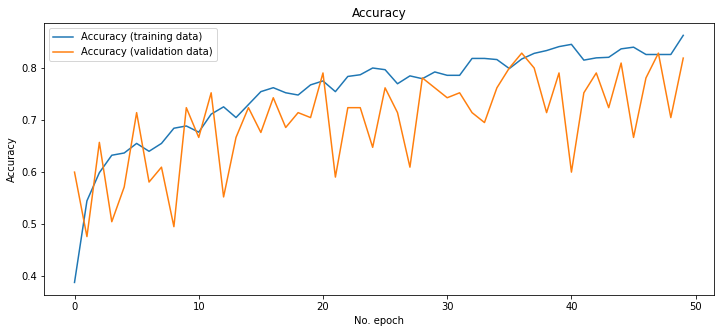

In [62]:
plt.figure(figsize=(12, 5))

plt.plot(hist.history['accuracy'], label='Accuracy (training data)')
plt.plot(hist.history['val_accuracy'], label='Accuracy (validation data)')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()

### Evaluating the Model on Validation set

In [63]:
cnn_model.evaluate(X_valid, y_valid)

4/4 [==============================] - 0s 63ms/step - loss: 0.6027 - accuracy: 0.8190


[0.6027138233184814, 0.8190476298332214]

## Saving Model
Now we will save the model and the weights in a file, so in that way we can use this model in future.

In [64]:
# serialize model to JSON
model_json = cnn_model.to_json()
with open("cnn_model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
cnn_model.save_weights("cnn_model.h5")
print("Saved model to disk")

Saved model to disk


## Loading Saved Model
Now we will load the saved model to test it with testing dataset

In [21]:
from keras.models import model_from_json

json_file = open('cnn_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("cnn_model.h5")

print("Loaded model from disk")
 
# Compiling loaded model
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Loaded model from disk


## Evaluating the model on testing dataset

In [22]:
loaded_model.evaluate(X_test, y_test, verbose=1)

2/2 [==============================] - 0s 55ms/step - loss: 0.5531 - accuracy: 0.8279


[0.5492489337921143, 0.8199999928474426]